# Problem statement:
Objective: To identify  different  segments  in  the  existing  customer  based  on  their spending patterns as well as past interaction with the bank

## Import libraries and Load the Data file into Python DataFrame and view top 10 rows

In [150]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

import scipy.cluster.hierarchy as shc 
from sklearn.cluster import AgglomerativeClustering 

In [151]:
data_df = pd.read_excel("Credit Card Customer Data.xlsx")
data_df.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [152]:
# Id columns is to identify rows hence can be skipped in analysis
# All columns have numerical values


## Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis

In [153]:
data_df.shape

(660, 7)

In [154]:
data_df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [155]:
# 
data_df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


# #Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.

In [156]:
data_df['Avg_Credit_Limit'].unique()

array([100000,  50000,  30000,  20000,  15000,   5000,   3000,  10000,
        13000,  11000,   9000,   6000,   8000,  19000,  16000,  18000,
        17000,  14000,  12000,   7000,  73000,  49000,  67000,  61000,
        75000,  48000,  56000,  72000,  70000,  51000,  69000,  40000,
        44000,  31000,  37000,  65000,  46000,  74000,  58000,  39000,
        52000,  33000,  47000,  71000,  41000,  59000,  64000,  45000,
        54000,  66000,  27000,  43000,  36000,  25000,  57000,  26000,
        38000,  35000,  34000,  28000,  63000,  29000,  68000,  42000,
        62000,  32000,  60000,  55000, 157000,  94000, 163000, 131000,
        96000, 136000, 121000, 158000, 108000, 166000, 176000, 178000,
        91000, 156000, 146000,  84000, 155000, 200000, 195000, 187000,
       106000, 114000, 126000, 173000, 153000, 184000, 123000, 144000,
        97000,  98000, 127000, 171000, 186000, 183000, 111000, 112000,
       132000,  95000, 172000,  99000, 145000, 167000])

In [157]:


# Check for missing value in any other column
data_df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [158]:
# Check for duplicate data

dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data_df[dups]

# To check for duplicates by column
#pd.concat(g for _, g in data_df.groupby("ID") if len(g) > 1).count()


Number of duplicate rows = 0


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


##  Perform bi variate analysis including correlation, pairplots and state the inferences.

In [159]:
# Check for correlation of variable
data_df.corr(method='pearson')

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,1.000000,0.052886,0.677962,0.739329,0.406438,0.033916,-0.684125
Customer Key,0.052886,1.000000,0.068604,-0.010281,-0.000560,0.022506,0.005968
Avg_Credit_Limit,0.677962,0.068604,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.739329,-0.010281,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,0.406438,-0.000560,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.033916,0.022506,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.684125,0.005968,-0.414352,-0.651251,-0.506016,0.127299,1.000000


In [160]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables
#Let us check for pair plots
#sns.pairplot(data_df,diag_kind='kde')

In [ ]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

## Remove any unwanted columns or outliers, standardize variables in pre-processing step

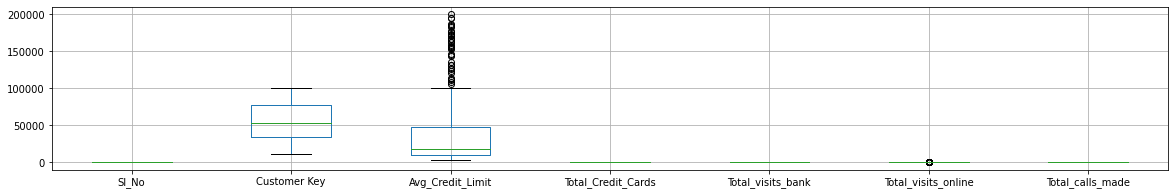

In [161]:
data_df.boxplot(figsize=(20,3))

In [162]:
# Drop SI_NI and Customer key and class variables
data_new = data_df.drop(['Sl_No','Customer Key'], axis =1)

data_new.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [163]:
# All variables are not on same scale, hence we do scaling.

from scipy.stats import zscore
data_new=data_new.apply(zscore)
data_new.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [164]:
#sns.pairplot(data_new,diag_kind='kde')

In [165]:
#data_new.boxplot(figsize=(20,3))

In [166]:
# Deal with outliers here
# Let us take logaritmic transform to remove outliers
#data_new['Avg_Credit_Limit'] = np.log(data_new['Avg_Credit_Limit'])



In [167]:
#data_new.boxplot(figsize=(20,3))

In [168]:
#data_new['Total_visits_online'] = np.log(data_new['Total_visits_online'])

In [169]:
#data_new.boxplot(figsize=(20,3))

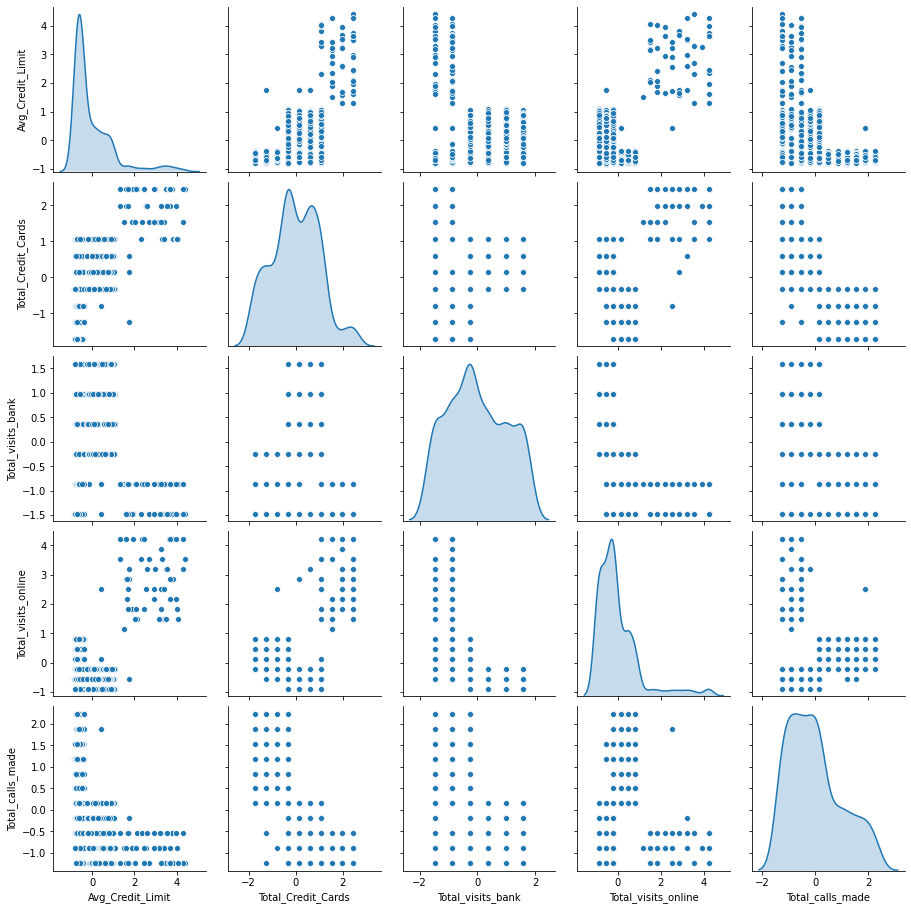

In [170]:
sns.pairplot(data_new,diag_kind='kde')

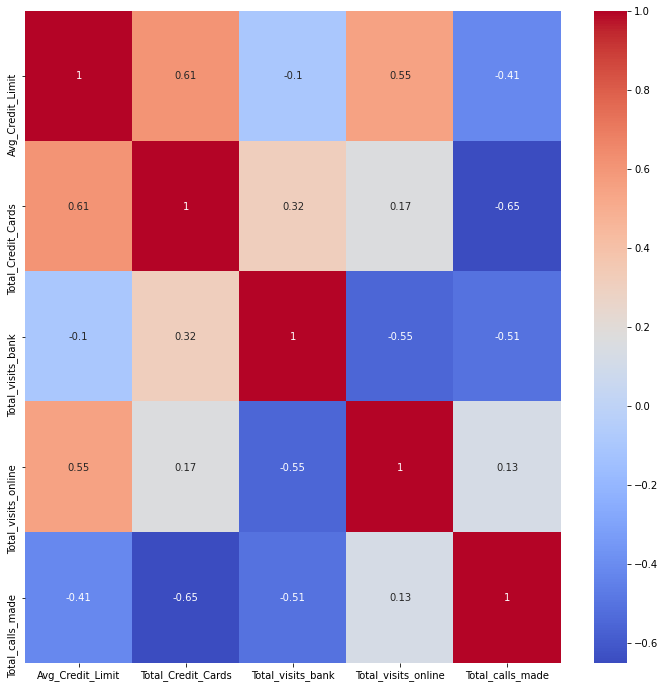

In [171]:
plt.figure(figsize = (12, 12))
sns.heatmap(data_new.corr(), annot=True, cmap='coolwarm', 
            xticklabels=data_new.columns,
            yticklabels=data_new.columns)

# Create Clusters


In [172]:
# Variables are scaled. Let us now try to create clusters

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(data_new)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3300.000000
1,2,2040.989816
2,3,933.043749
3,4,780.773690
4,5,704.600065
5,6,642.252969
6,7,600.068491
7,8,574.350684
8,9,534.260096
9,10,512.019562


# Identify the appropriate clusters 

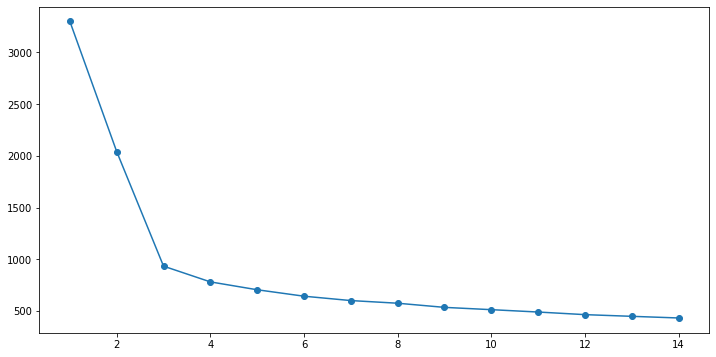

In [173]:
from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [174]:
# We could see the bend at 3, so let us create 3 custers

kmeans = KMeans(n_clusters=3, n_init = 5, random_state=12345)
kmeans.fit(data_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=12345, tol=0.0001, verbose=0)

# Check for no of values in each cluster and centers for each variables

In [175]:
# Check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 50 224 386]


In [176]:
# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(data_new) )
centroid_df.transpose()

,0,1,2
Avg_Credit_Limit,2.831764,-0.595796,-0.021062
Total_Credit_Cards,1.862226,-1.059623,0.373690
Total_visits_bank,-1.105763,-0.901518,0.666395
Total_visits_online,2.827319,0.322997,-0.553672
Total_calls_made,-0.874330,1.148109,-0.553005


# Assign the groups created above to data frame and study the characteristics for each group.

In [177]:
# Add cluster number to original data

predictions = kmeans.predict(data_new)
predictions
data_df["group"] = predictions
data_df['group'] = data_df['group'].astype('category')
data_df.dtypes

Sl_No                     int64
Customer Key              int64
Avg_Credit_Limit          int64
Total_Credit_Cards        int64
Total_visits_bank         int64
Total_visits_online       int64
Total_calls_made          int64
group                  category
dtype: object

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matpl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26fd1190>,
      dtype=object)

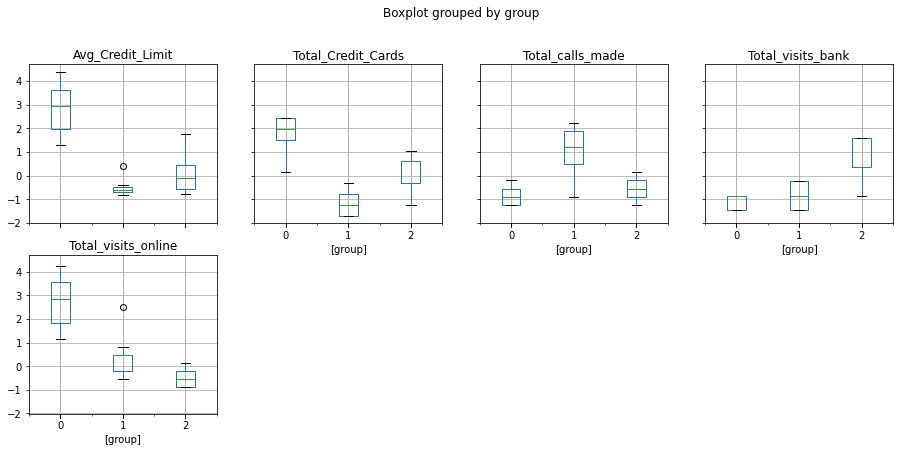

In [178]:
# Visualize the centers

data_new["group"] = predictions
data_new.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

In [179]:
data_new1 = data_df.drop(['Sl_No','Customer Key'], axis =1)
data_new1=data_new1.apply(zscore)


# Get silhouette score for Kmeans

In [180]:
parameters = {'n_clusters': [2, 3, 4, 5, 6]}

parameter_grid = ParameterGrid(parameters)

In [181]:
list(parameter_grid)

[{'n_clusters': 2},
 {'n_clusters': 3},
 {'n_clusters': 4},
 {'n_clusters': 5},
 {'n_clusters': 6}]

In [182]:
best_score = -1
model = KMeans()

In [183]:
for g in parameter_grid:
    model.set_params(**g)
    model.fit(data_new1)

    ss = metrics.silhouette_score(data_new1, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'n_clusters': 2} Score:  0.4852026660632224
Parameter:  {'n_clusters': 3} Score:  0.5711196186026501
Parameter:  {'n_clusters': 4} Score:  0.38359520087799465
Parameter:  {'n_clusters': 5} Score:  0.279495945078126
Parameter:  {'n_clusters': 6} Score:  0.26330046412924224


In [184]:
best_grid

{'n_clusters': 3}

# For K Means 3 clusters is the best with Silhouette score of 0.57


# -----Now Hierarchial Clustering  with Ward------


In [185]:
#### generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(data_new1, 'ward', metric='euclidean')
Z.shape

(659, 4)

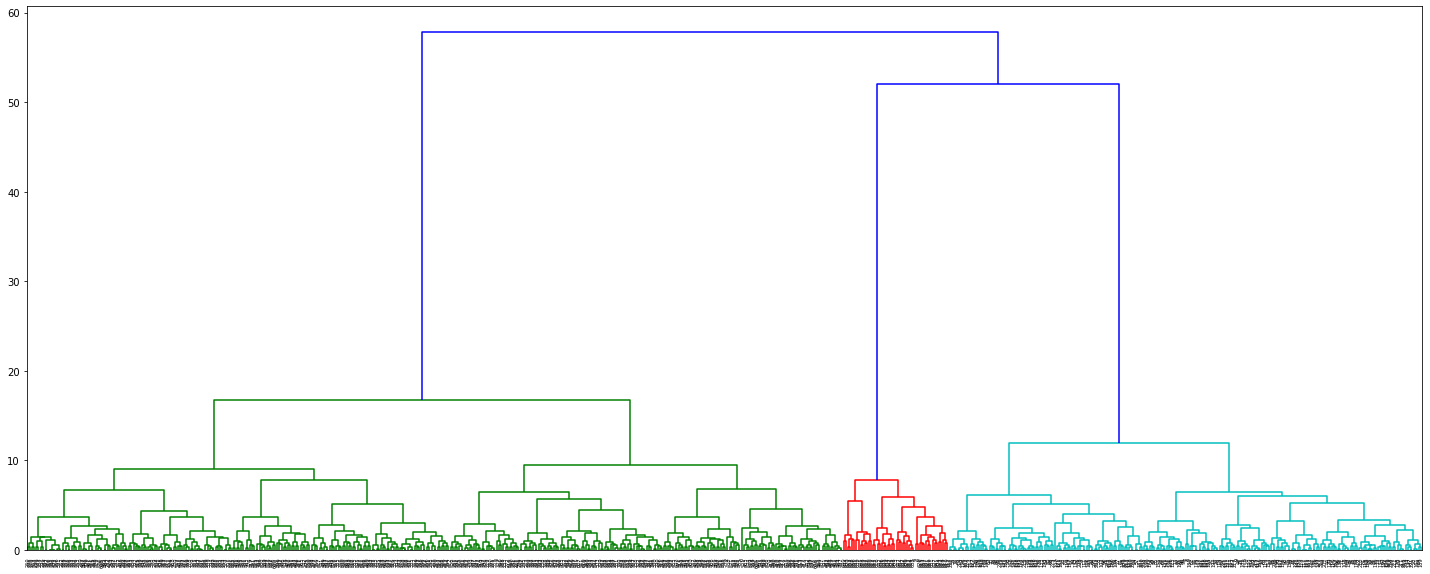

In [186]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

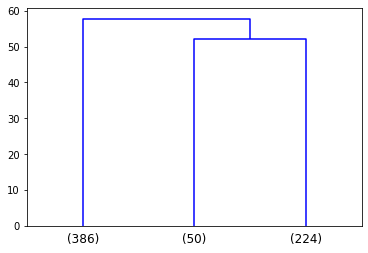

In [187]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [188]:
max_d = 50
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 3, 1, 1, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Get different Solhoutte scores


0.4852026660632224
0.5711196186026501
0.3748375267000219
0.26245447044412346


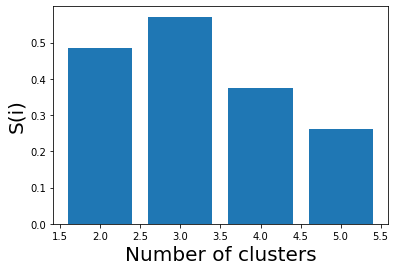

In [189]:
k = [2, 3, 4, 5]
ac2 = AgglomerativeClustering(n_clusters = 2) 
ac3 = AgglomerativeClustering(n_clusters = 3) 
ac4 = AgglomerativeClustering(n_clusters = 4) 
ac5 = AgglomerativeClustering(n_clusters = 5) 
silhouette_scores = [] 
s2 = silhouette_score(data_new1, ac2.fit_predict(data_new1))
silhouette_scores.append(s2) 
print(s2)
s3 = silhouette_score(data_new1, ac3.fit_predict(data_new1))
silhouette_scores.append(s3)
print(s3)
s4 = silhouette_score(data_new1, ac4.fit_predict(data_new1))
silhouette_scores.append(s4) 
print(s4)
s5 = silhouette_score(data_new1, ac5.fit_predict(data_new1))
silhouette_scores.append(s5) 
print(s5)
  
# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 

# For Hierarchial 3 clusters is the best with Silhouette score of 0.57

### Calculate Cophenetic Correlation Coefficient

In [190]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(data_new1))
c

0.7897979487562939

In [193]:
# Let us try with K = 3 (to demonstrate the 3d plot using mplot3d)
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

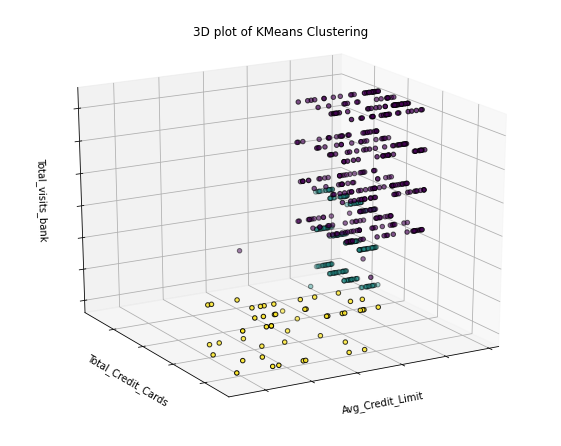

In [196]:

## 3D plots of clusters

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
k3_model=KMeans(3)
k3_model.fit(data_new)
labels = k3_model.labels_
ax.scatter(data_new.iloc[:, 0], data_new.iloc[:, 1], data_new.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Avg_Credit_Limit')
ax.set_ylabel('Total_Credit_Cards')
ax.set_zlabel('Total_visits_bank')
ax.set_title('3D plot of KMeans Clustering')